# Introduction :


Real-world data rarely comes clean. Using Python and its libraries, in this project data wrangling processes will be applied to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 

The dataset consits of the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. 

WeRateDogs has over 4 million followers and has received international media coverage.

In this project, Tweepy will be used to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive. This additional data will include retweet count and favorite count. 

Data wrangling in this project consists of:

- Gathering data
- Assessing data
- Cleaning data

In addtion to storing, analyzing, and visualizing the wrangled data. 


## Gathering Data :

In [7]:
import pandas as pd
import numpy as np
import requests
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
# Use requests library to download tsv file from a website
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read in tsv file as a Pandas DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [10]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [11]:
# Create tweet_info DataFrame
tweet_info = pd.DataFrame()

tweet_info['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [12]:
tweet_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assess Data : 

In the cells below, the obtainted dataframes from the cells above are visualaully assessment. There are three dataframes : 

- tweet_archive dataframe is twitter archive obtained from WeRateDogs account, downloaded from Udacity. It contians the tweet's text, rating, and dog category
- image_predictions has the results of a neural network trying to identify dog breed in a tweet's picture, retrived using BeautifulSoup library from Udacity Servers. 
- tweets_info which retrieved from Twittter API has retweet and favorite counts. 


In [13]:
tweet_archive.shape

(2356, 17)

In [14]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


We can see from twitter_archive head most of dog stages are none, meaning there might be multiple missing data from the set.

In [15]:
image_predictions.shape

(2075, 12)

In [16]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


From visual assesment of the three dataframes, we can see that all three dataframes share the tweet_id column but there is a mismatch in length of each, which means there are some missing data from the image_predictions or not all tweets have an image. There are only two rows missing from the tweet_info dataframe. 

In [17]:
tweet_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data : 

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be strings instead of float, because we don't want any operations on them, they also have many NaN values. 
- retweeted_status_timestamp, timestamp should be datetime instead of object (string). 
-  name, doggo, floofer, pupper, puppo columns include None values instead of NaN, but Pandas treats None and NaN as essentially interchangeable for indicating missing or null values so it won't be an issue. 
- rating_numerator, rating_denominator are integers but prefered to be float. 
- Some of the elements of the name of the dog are not real name like "a","None" "an", should be replacedby null-value.
- The timestamp column is an object. It has to be a datetime object.
- There are 2075 rows in the images dataframe and 2356 rows in the archive dataframe.
- In several columns, null values are not treated as null values.
- Missing values in 'name' and dog stages showing as 'None' instead of NaN. 
- tweet_archive contains retweets
- Some tweets don't include images 

In [18]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
print(tweet_archive.duplicated().sum())
print(image_predictions.duplicated().sum())
print(tweet_info.duplicated().sum())


0
0
0


There are no duplicated values in all dataframes. 

### Tidiness : 

- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo instead of one column filled with their values.
- Join 'tweet_info' and 'image_predictions' to 'twitter_archive'
- We can see that all three columns share tweet_id column, all are the same type so we can merge these dataframes on that column. 

## Data Cleaning : 


In [111]:
df = pd.merge(tweet_archive, image_predictions, on='tweet_id')

In [112]:
df = pd.merge(tweet_info, df, on='tweet_id')

In [113]:
df.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,8853,39467,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6514,33819,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,4328,25461,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,8964,42908,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,9774,41048,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [114]:
# Check Columns 
df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [115]:
# Save copy of the merged dataframe before doing any cleaning 
df_pre_cleaning = df.copy()

In [116]:
df_pre_cleaning .to_csv('df_pre_cleaning .csv')

Define : timestamp is in object type

Code : 

In [117]:
# Convert timestamp from object to datatime
df['timestamp'] = pd.to_datetime(df['timestamp'])


Test :

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                       

Removing tweets without images 

Code : 


In [119]:
df = df[pd.notnull(df['jpg_url'])]

Test : 

In [120]:
df['jpg_url']

0         https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1         https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2         https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3         https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4         https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5         https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
6         https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
7         https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
8         https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9         https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
10        https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg
11        https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg
12        https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg
13        https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg
14        https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
15      https://pbs.twimg.com/ext_tw_video_thumb/88927...
16        https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
17        http

We can see from above result, there are no tweeets without photos. 

Removing retweets :
    
Code : 

In [121]:

df = df[pd.isnull(df['retweeted_status_id'])]


Test : 

In [122]:
df['retweeted_status_id']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
2043   NaN
2044   NaN
2045   NaN
2046   NaN
2047   NaN
2048   NaN
2049   NaN
2050   NaN
2051   NaN
2052   NaN
2053   NaN
2054   NaN
2055   NaN
2056   NaN
2057   NaN
2058   NaN
2059   NaN
2060   NaN
2061   NaN
2062   NaN
2063   NaN
2064   NaN
2065   NaN
2066   NaN
2067   NaN
2068   NaN
2069   NaN
2070   NaN
2071   NaN
2072   NaN
Name: retweeted_status_id, Length: 1994, dtype: float64

In [123]:
df.shape

(1994, 30)

In [124]:
df.head(2)

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,8853,39467,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6514,33819,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Tidiness Issue : Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available : 
 
 
Code : 


In [125]:
df['dog_stage'] = df['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [126]:
df = df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


In [127]:
df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'dog_stage'],
      dtype='object')

Test : 

In [130]:
df['dog_stage'].value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

In [131]:
# drop columns useless to the analysis 
df = df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
df.shape

(1994, 24)

We can see the values of each of these categories don't add up to the total level of the rows in the frame, meaning there are a lot of NaN values in the dog stages. 

Tidiness issue : Create 'breed' and 'confidence' of prediction columns by processing these values to have one table with dog breed. 

Code : 

In [132]:

breed = [] 
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

df.apply(breed_conf, axis = 1)

df['breed'] = breed
df['confidence'] = conf

Test : 

In [134]:
df.head(3)

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,breed,confidence
0,892420643555336193,8853,39467,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,Unidentifiable,0.000000
1,892177421306343426,6514,33819,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,...,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,Chihuahua,0.323581
2,891815181378084864,4328,25461,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,...,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,Chihuahua,0.716012


In [135]:
df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

In [136]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)


In [137]:
df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'timestamp', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'jpg_url', 'img_num', 'dog_stage', 'breed', 'confidence'],
      dtype='object')

Create a new column with rating in float type 

Code : 

In [139]:

df['rating'] = 10 * df['rating_numerator'] / df['rating_denominator'].astype(float)
df.head(2)

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_stage,breed,confidence,rating
0,892420643555336193,8853,39467,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,Unidentifiable,0.000000,13.0
1,892177421306343426,6514,33819,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581,13.0


Test :

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id              1994 non-null int64
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_stage             326 non-null object
breed                 1994 non-null object
confidence            1994 non-null float64
rating                1994 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 344.8+ KB


We can see that the rating type is float. 

In [141]:
df['rating'].value_counts()


12.000000      454
10.000000      421
11.000000      402
13.000000      261
9.000000       151
8.000000        95
7.000000        51
14.000000       35
5.000000        34
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
0.000000         2
75.000000        1
6.363636         1
27.000000        1
8.181818         1
26.000000        1
1776.000000      1
34.285714        1
420.000000       1
Name: rating, dtype: int64

In [142]:
df['breed'].value_counts()

Unidentifiable                 308
golden_retriever               158
Labrador_retriever             108
Pembroke                        95
Chihuahua                       91
pug                             62
toy_poodle                      51
chow                            48
Pomeranian                      42
Samoyed                         42
malamute                        33
Chesapeake_Bay_retriever        31
French_bulldog                  31
cocker_spaniel                  30
miniature_pinscher              25
Eskimo_dog                      22
Cardigan                        21
German_shepherd                 21
Staffordshire_bullterrier       21
Siberian_husky                  20
beagle                          20
Shih-Tzu                        20
Rottweiler                      19
Maltese_dog                     19
Shetland_sheepdog               19
Lakeland_terrier                18
kuvasz                          18
Italian_greyhound               17
basset              

## Storing Data :

In [143]:
#Store the clean DataFrame in a CSV file
df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analysis and Visualizition : 

Text(0,0.5,'Breed')

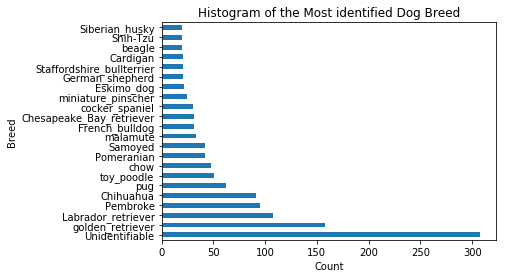

In [144]:
df_breed = df.groupby('breed').filter(lambda x: len(x) >= 20)

df_breed['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most identified Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed')

From this graph we can see that the image predicting algorithem has failed in identifying more that 300 of the dogs from the account WeRateDogs. 

Anything with unidentified value will be dropped from the dataframe. 

In [145]:
#CODE:
df = df[df['breed'] != 'Unidentifiable']

#TEST
df['breed'].value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Samoyed                            42
Pomeranian                         42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Staffordshire_bullterrier          21
German_shepherd                    21
Cardigan                           21
Shih-Tzu                           20
beagle                             20
Siberian_husky                     20
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
kuvasz                             18
Lakeland_terrier                   18
basset      

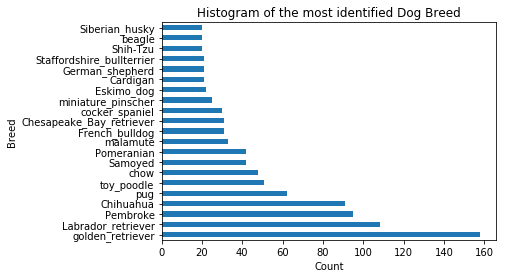

In [146]:
df_breed = df.groupby('breed').filter(lambda x: len(x) >= 20)

df_breed['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the most identified Dog Breed');
plt.xlabel('Count');
plt.ylabel('Breed');


From the histogram above we can see that the Golden Retriver is the most common identified dog in the set. We can't conclude why these breeds are the top breeds. It could be because they are commonly owned or they are the easiest to identify by the AI algorithem

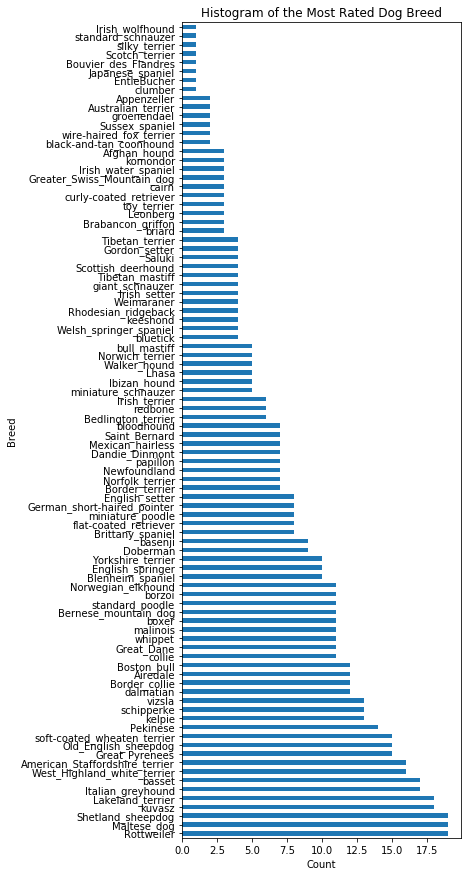

In [147]:
df_breed = df.groupby('breed').filter(lambda x: len(x) <= 19)

df_breed['breed'].value_counts().plot(kind = 'barh',figsize=(5, 15))
plt.title('Histogram of the Most Rated Dog Breed');
plt.xlabel('Count');
plt.ylabel('Breed');


clumber, EntleBucher, Scotch_terrier, Japanese_spaniel, standard_schnauzer, Bouvier_des_Flandres and Irish_wolfhound are least identified dogs for the algorithem.

In [148]:
df_breed_mean = df.groupby('breed').mean()
df_breed_mean.head()

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,confidence,rating
breed,,,,,,,,
Afghan_hound,8.041621e+17,5976.0000,17326.666667,9.666667,10.0,1.000000,0.433959,9.666667
Airedale,7.184489e+17,1393.7500,5280.833333,9.833333,10.0,1.166667,0.583771,9.833333
American_Staffordshire_terrier,7.597284e+17,2310.8125,9380.187500,10.312500,10.0,1.187500,0.527359,10.312500
Appenzeller,7.939334e+17,1458.0000,7317.500000,11.000000,10.0,1.000000,0.503665,11.000000
Australian_terrier,7.785921e+17,3078.5000,11127.500000,11.500000,10.0,2.000000,0.307584,11.500000


In [149]:
df_breed_sorted = df_breed_mean['rating'].sort_values()

df_breed_sorted

breed
Japanese_spaniel                5.000000
soft-coated_wheaten_terrier     8.800000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.333333
Boston_bull                     9.416667
Welsh_springer_spaniel          9.500000
Maltese_dog                     9.526316
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
Afghan_hound                    9.666667
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Great_Dane                      9.818182
Airedale                        9.833333
Saint_Bernard                   9.857143
Newfoundland                    9.857143
Mexican_hairless                9.857143
English_setter                  9.875000
miniature_poodle                9.875000
Irish_terrier                  10.000000
miniature_

clumber has the highest mean ratings and Japanese_spaniel has the lowest. Both are of the lowest identifed dog breeds. 

In [150]:
df_breed_count = df.groupby('breed').mean()
df_breed_count.head()

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,confidence,rating
breed,,,,,,,,
Afghan_hound,8.041621e+17,5976.0000,17326.666667,9.666667,10.0,1.000000,0.433959,9.666667
Airedale,7.184489e+17,1393.7500,5280.833333,9.833333,10.0,1.166667,0.583771,9.833333
American_Staffordshire_terrier,7.597284e+17,2310.8125,9380.187500,10.312500,10.0,1.187500,0.527359,10.312500
Appenzeller,7.939334e+17,1458.0000,7317.500000,11.000000,10.0,1.000000,0.503665,11.000000
Australian_terrier,7.785921e+17,3078.5000,11127.500000,11.500000,10.0,2.000000,0.307584,11.500000


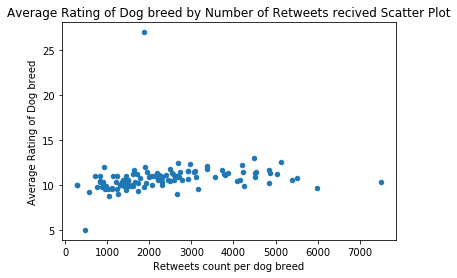

In [151]:
df_breed_count.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweets count per dog breed');
plt.ylabel('Average Rating of Dog breed');
plt.title('Average Rating of Dog breed by Number of Retweets recived Scatter Plot');


The data points line up nicely, however, the fact that the line would be horizontal means that the input values (that is, the x-values) are irrelevant to the output values (that is, the y-values). 

So there is a definite trend to the data, and there is an excellent good-fit line for it, but that line only says that the input values are irrelevant. If the inputs are irrelevant, then there can't possibly be a correlation between inputs and outputs. That is, the amount of retweets received by a dog breed doesn’t correlate in anyway with the average rating received,

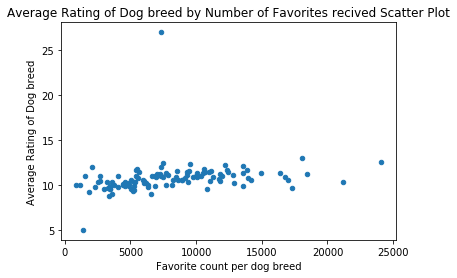

In [152]:
df_breed_count.plot(x='favorite_count', y='rating', kind='scatter')
plt.xlabel('Favorite count per dog breed');
plt.ylabel('Average Rating of Dog breed');
plt.title('Average Rating of Dog breed by Number of Favorites recived Scatter Plot');


Same relationship goes for the favorite counts.

In [153]:
df.set_index('timestamp', inplace=True)

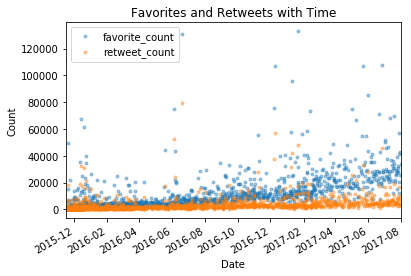

In [154]:
df[['favorite_count', 'retweet_count']].plot(style = '.', alpha = 0.4)
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

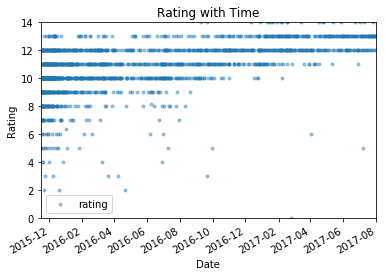

In [155]:
df.plot(y ='rating', ylim=[0,14], style = '.', alpha = 0.4)
plt.title('Rating with Time')
plt.xlabel('Date')
plt.ylabel('Rating');

From these two plots, we can see the gradual increase of both favorites and retweets over time, and ratings which could mean more users have started following the account, making it more popular and rating more dogs. 



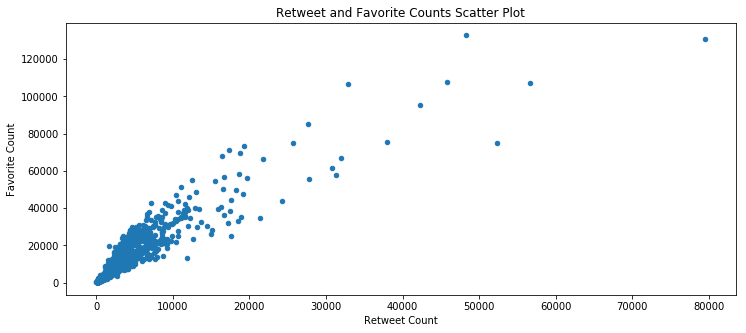

In [156]:
df.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(12,5))
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');
plt.title('Retweet and Favorite Counts Scatter Plot');


From this scatter plot we can that there is almost a proportional relationship between the retweets and favorite coutns, it could be said that the amount of favorites are almost as twice the retweets.

In [157]:
df.groupby('dog_stage')['rating'].describe()


,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,61.0,11.704918,1.636503,5.0,11.0,12.0,13.0,14.0
floofer,3.0,12.666667,0.577350,12.0,12.5,13.0,13.0,13.0
pupper,183.0,10.918033,1.797083,6.0,10.0,11.0,12.0,26.0
puppo,27.0,12.111111,1.219500,9.0,12.0,12.0,13.0,14.0


Floofers minimum rating is above 10. We can assume that Floofer stage is the most favorable by users and floofers are consistently good dogs.

